In [99]:
# prepare_data_for_eda.py scrip, without saving out to pkl or csv
import os
import pandas as pd
import logging.config
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler #for matplotlib colors
import seaborn as sns
from sklearn import preprocessing

import importlib
import plot_functions


LOGGING_CONFIG = os.getenv('LOGGING_CONFIG')
logging.config.fileConfig(LOGGING_CONFIG)
logger = logging.getLogger('prepare_data_for_eda')

In [2]:
DATADIR = os.getenv('DATADIR')
logger.info("using DATADIR {}".format(DATADIR))

2018-05-30 15:47:20,818 - prepare_data_for_eda - INFO - using DATADIR ../DATA


In [3]:
content_performance = pd.read_csv(os.path.join(DATADIR, 'content_performance.csv.gz'),  compression='gzip', 
                                 dtype={'pageviews': 'float64',
 'unique_pageviews': 'float64',
 'feedex_comments': 'float64',
 'is_this_useful_yes': 'float64',
 'is_this_useful_no': 'float64',
 'number_of_internal_searches': 'float64',
 'exits': 'float64',
 'entrances': 'float64',
 'bounce_rate': 'float64',
 'avg_time_on_page': 'float64',
 'id': 'int64',
 'content_id': 'object',
 'title': 'object',
 'base_path': 'object',
 'description': 'object',
 'number_of_pdfs': 'float64',
 'document_type': 'object',
 'content_purpose_document_supertype': 'object',
 'first_published_at': 'object',
 'public_updated_at': 'object',
 'number_of_word_files': 'float64',
 'status': 'object',
 'readability_score': 'float64',
 'contractions_count': 'float64',
 'equality_count': 'float64',
 'indefinite_article_count': 'float64',
 'passive_count': 'float64',
 'profanities_count': 'float64',
 'redundant_acronyms_count': 'float64',
 'repeated_words_count': 'float64',
 'simplify_count': 'float64',
 'spell_count': 'float64',
 'string_length': 'float64',
 'sentence_count': 'float64',
 'word_count': 'float64',
 'primary_organisation_title': 'object',
 'primary_organisation_content_id': 'object',
 'primary_organisation_withdrawn': 'object',
 'content_hash': 'object',
 'locale': 'object',
 'publishing_api_payload_version': 'int64',
 '_merge': 'category',
 'count_survey_responses': 'float64',
 'response_per_pageview': 'float64',
 'response_per_unique_pageview': 'float64',
 'useful_per_responses': 'float64',
 'total_to_unique_pageviews': 'float64',
 'create_total_to_unique_pageviews': 'float64',
 'feedex_per_unique_1000': 'float64',
 'searches_per_pageview_1000': 'float64',
 'contractions_count_scaled': 'float64',
 'indefinite_article_count_scaled': 'float64',
 'redundant_acronyms_count_scaled': 'float64',
 'repeated_words_count_scaled': 'float64',
 'spell_count_scaled': 'float64',
 'readability_score_scaled': 'float64',
 'equality_count_scaled': 'float64',
 'passive_count_scaled': 'float64',
 'simplify_count_scaled': 'float64',
 'profanities_count_scaled': 'float64',
 'spelling_grammar': 'float64',
 'style': 'float64',
 'errors': 'float64'})

In [141]:
conditions = [
    (content_performance.base_path.str.startswith('/government', na=False)), 
    (content_performance.base_path.str.startswith('/guidance', na=False))]
     
choices = ['whitehall',  'guides_manuals']
content_performance['content_management'] = np.select(conditions, choices, default='mostly_mainstream')

In [142]:
content_performance['content_management'].value_counts()

whitehall            276678
mostly_mainstream    163229
guides_manuals         6943
Name: content_management2, dtype: int64

In [167]:
ga_vars = content_performance[['pageviews', 
                  'unique_pageviews', 
                  'feedex_comments', 
                  'is_this_useful_yes',
                               'is_this_useful_no',
                  'number_of_internal_searches','exits', 'entrances', 'bounce_rate', 
                  'count_survey_responses',
                  'response_per_pageview', 
                  'response_per_unique_pageview',
                  'useful_per_responses', 
                  'total_to_unique_pageviews',
                               'feedex_per_unique_1000'
                 ]].replace([np.inf, -np.inf], np.nan)
spell_grammar_vars = content_performance[[
                  'readability_score', 
                  'contractions_count', 
                  'equality_count',
                  'indefinite_article_count', 
                  'passive_count', 
                  'profanities_count',
                  'redundant_acronyms_count', 
                  'repeated_words_count', 
                  'simplify_count',
                  'spell_count',  
                 ]].replace([np.inf, -np.inf], np.nan)
content_vars = content_performance[[ 
                  'number_of_pdfs', 
                  'number_of_word_files',
                  'string_length', 
                  'sentence_count', 
                  'word_count'
                 ]].replace([np.inf, -np.inf], np.nan)

all_content_vars = content_performance[[ 'pageviews', 
                                        'unique_pageviews', 
                                        'feedex_comments',
                                        'is_this_useful_yes', 
                                        'is_this_useful_no',
                                        'number_of_internal_searches', 'exits', 'entrances', 'bounce_rate', 
                                        'number_of_pdfs', 
                                        'document_type', 
                                        'content_purpose_document_supertype',
                                        'first_published_at', 
                                        'public_updated_at', 
                                        'number_of_word_files',
                                        'status',                                          
                                        'string_length', 
                                        'sentence_count', 
                                        'word_count',
                                        'primary_organisation_content_id',
                                        'locale',
                                        'publishing_api_payload_version', 
                                        'count_survey_responses',
                                        'response_per_pageview', 
                                        'response_per_unique_pageview',
                                        'useful_per_responses', 
                                        'total_to_unique_pageviews',
                                        'feedex_per_unique_1000', 
                                        'searches_per_pageview_1000',
                                        'contractions_count_scaled', 
                                        'indefinite_article_count_scaled',
                                        'redundant_acronyms_count_scaled', 
                                        'repeated_words_count_scaled',
                                        'spell_count_scaled', 
                                        'readability_score_scaled',
                                        'equality_count_scaled', 
                                        'passive_count_scaled',
                                        'simplify_count_scaled', 
                                        'profanities_count_scaled', 
                                        'spelling_grammar',
                                        'style', 
                                        'errors', 'avg_time_on_page'
                                       ]].replace([np.inf, -np.inf], np.nan)

composite_vars = content_performance[['spelling_grammar',
                                        'style', 
                                        'errors'
                                       ]].replace([np.inf, -np.inf], np.nan)

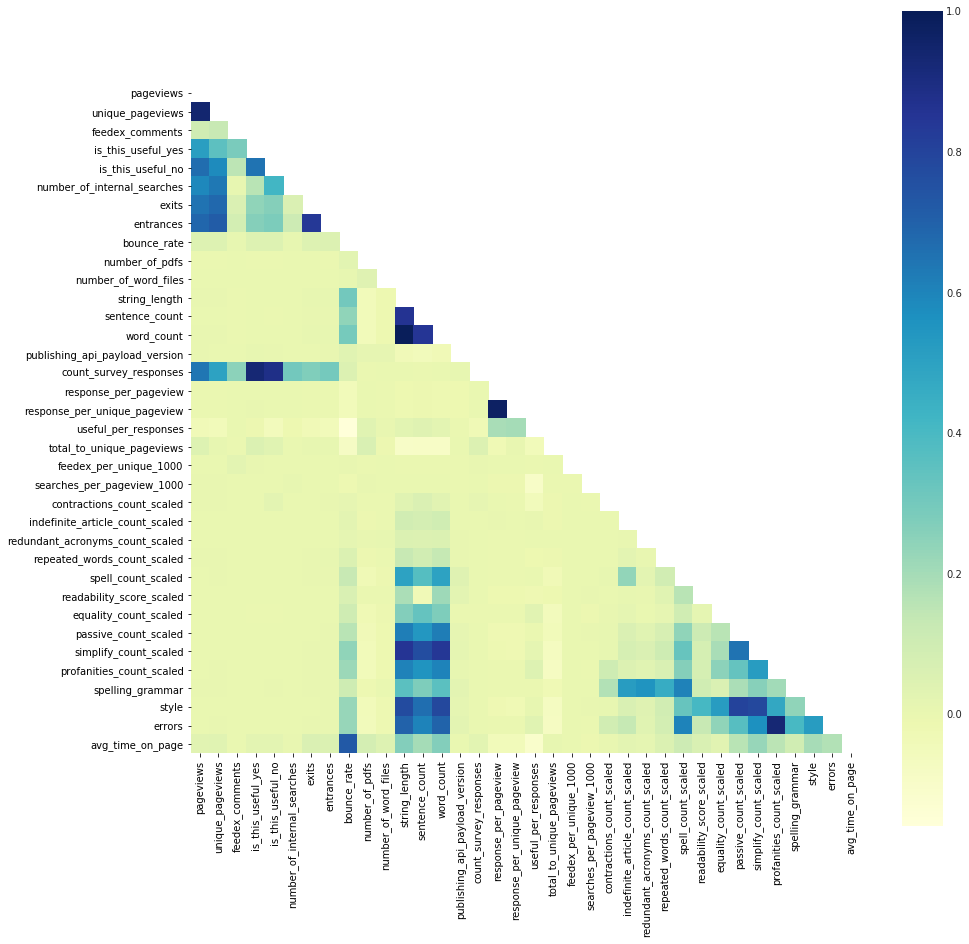

In [168]:
# calculate the correlation matrix
corr_all = all_content_vars.corr()

# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)
fig, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr_all)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_all, mask=mask, square=True, cmap="YlGnBu")

In [170]:
# calculate the correlation matrix
corr_all['bounce_rate'].sort_values(ascending=False)

bounce_rate                        1.000000
avg_time_on_page                   0.724018
string_length                      0.302522
word_count                         0.297052
simplify_count_scaled              0.242876
sentence_count                     0.239957
errors                             0.229910
style                              0.227234
profanities_count_scaled           0.217611
passive_count_scaled               0.158168
spell_count_scaled                 0.129701
spelling_grammar                   0.104544
equality_count_scaled              0.102728
readability_score_scaled           0.066615
repeated_words_count_scaled        0.056121
entrances                          0.051750
count_survey_responses             0.050149
unique_pageviews                   0.046514
pageviews                          0.046475
is_this_useful_yes                 0.045933
is_this_useful_no                  0.045113
exits                              0.044388
publishing_api_payload_version  

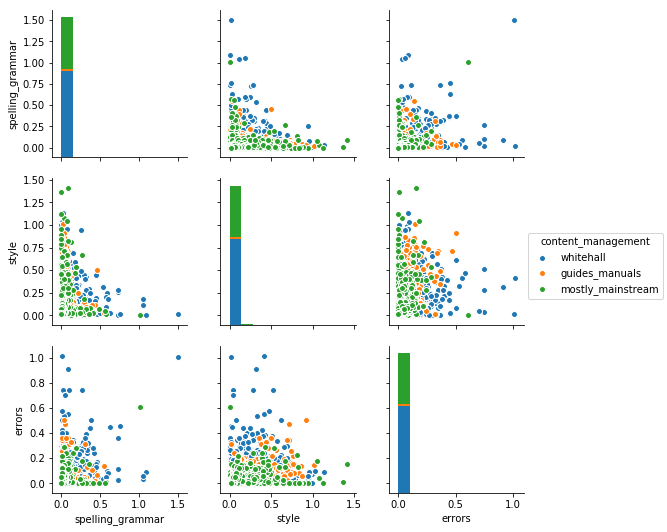

In [146]:
sns.pairplot(content_performance, vars=['spelling_grammar',
                                        'style', 
                                        'errors'], hue='content_management', hue_order=['whitehall', 'guides_manuals', 'mostly_mainstream'],
             dropna=True)

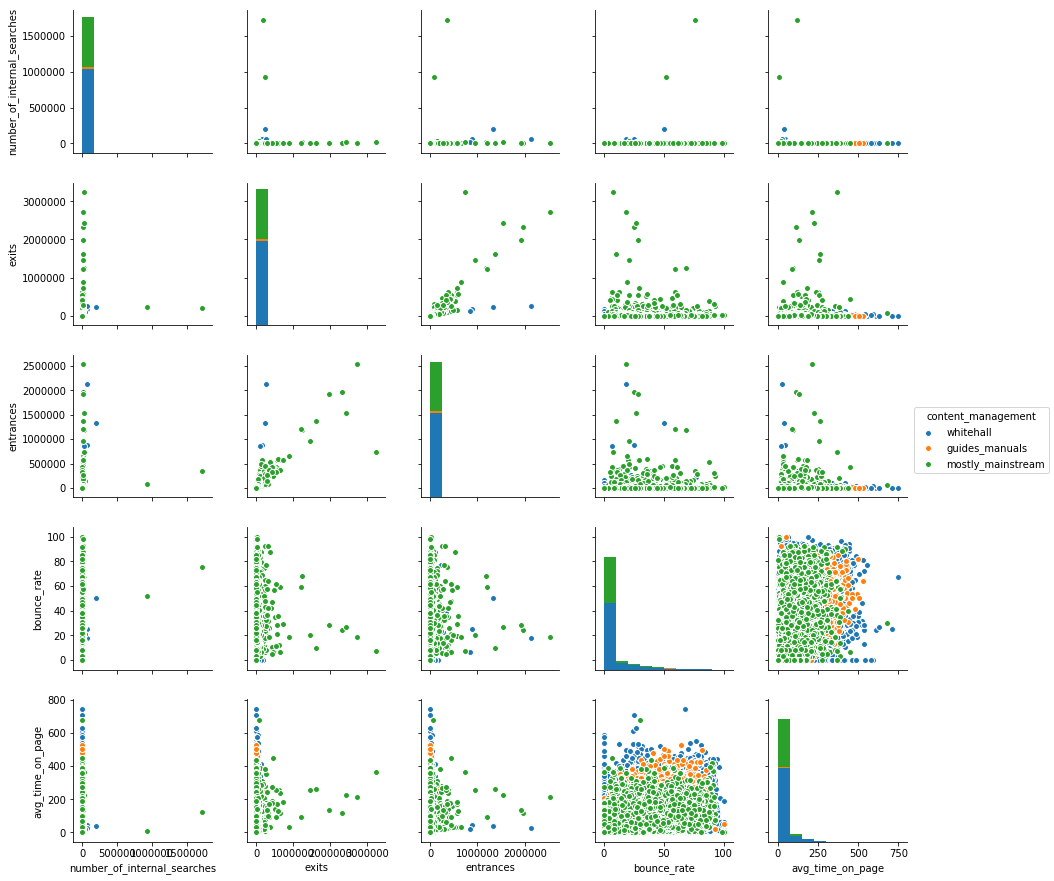

In [166]:
sns.pairplot(content_performance, vars=['number_of_internal_searches', 'exits', 'entrances', 'bounce_rate','avg_time_on_page'], hue='content_management', hue_order=['whitehall', 'guides_manuals', 'mostly_mainstream'],
             dropna=True)

In [82]:
with pd.option_context('mode.use_inf_as_null', True):
    print(sum(content_performance['bounce_rate'].isna()))
    print(sum(content_performance['useful_per_responses'].isna()))
    print(sum(content_performance['string_length'].isna()))

0
413271
2


/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


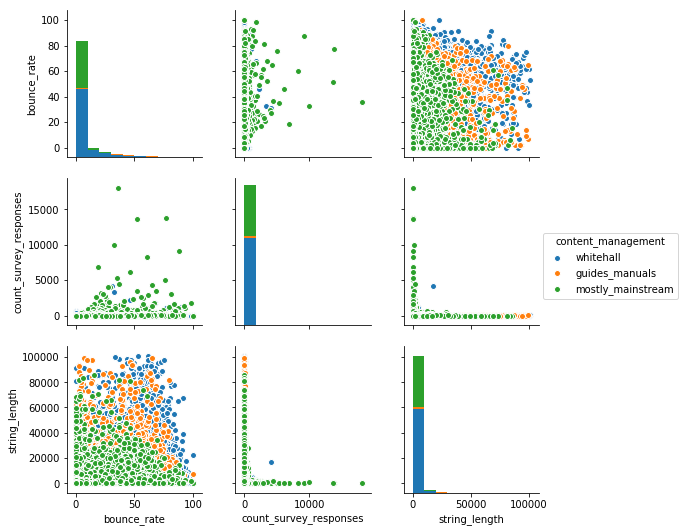

In [147]:
sns.pairplot(content_performance, vars=['bounce_rate',
                                         'count_survey_responses',
                                        'string_length'], hue='content_management', hue_order=['whitehall', 'guides_manuals', 'mostly_mainstream'],
             dropna=True)

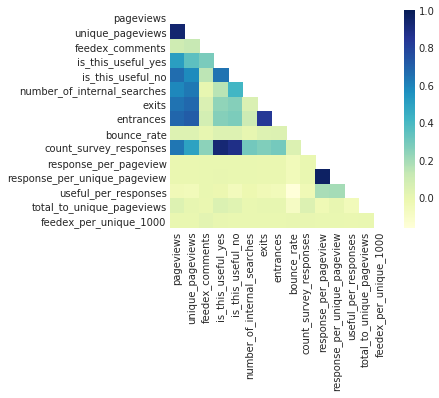

In [9]:
# calculate the correlation matrix
corr = ga_vars.corr()

# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cmap="YlGnBu")

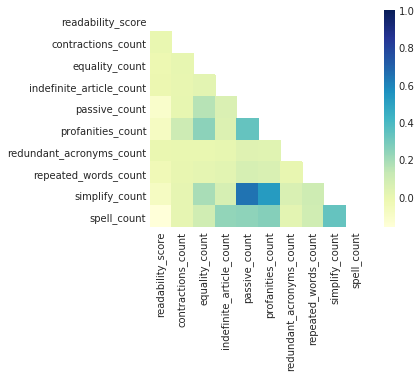

In [10]:
# calculate the correlation matrix
corr_sg = spell_grammar_vars.corr()

# # plot the heatmap
# sns.heatmap(corr_sg, 
#         xticklabels=corr_sg.columns,
#         yticklabels=corr_sg.columns)

mask = np.zeros_like(corr_sg)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_sg, mask=mask, square=True, cmap="YlGnBu")

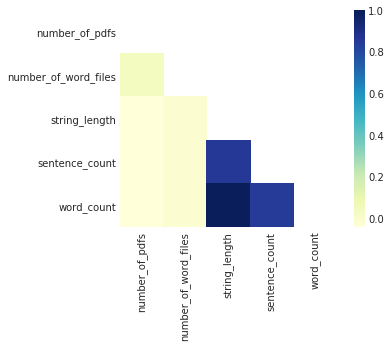

In [11]:
# calculate the correlation matrix
corr_content = content_vars.corr()

# # plot the heatmap
# sns.heatmap(corr_content, 
#         xticklabels=corr_content.columns,
#         yticklabels=corr_content.columns)

mask = np.zeros_like(corr_content)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_content, mask=mask, square=True, cmap="YlGnBu")

### correlation

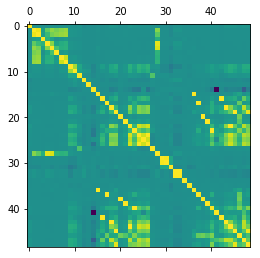

In [13]:
plt.matshow(content_performance.corr())

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


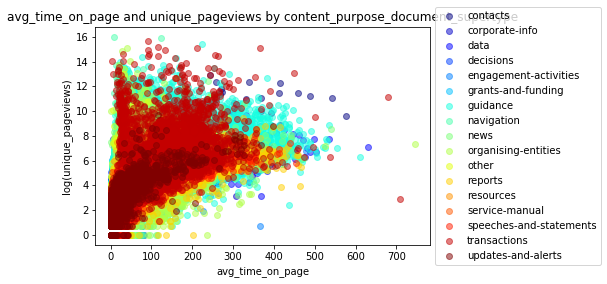

In [173]:
scatter_byvar(df=content_performance, x='avg_time_on_page', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


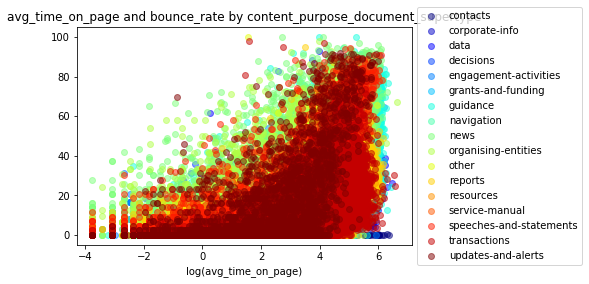

In [180]:
scatter_byvar(df=content_performance, x='avg_time_on_page', y='bounce_rate', byvar='content_purpose_document_supertype', ylog=False, xlog=True)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


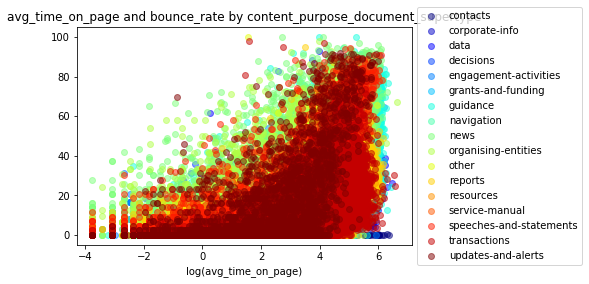

In [180]:
scatter_byvar(df=content_performance, x='avg_time_on_page', y='bounce_rate', byvar='content_purpose_document_supertype', ylog=False, xlog=True)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


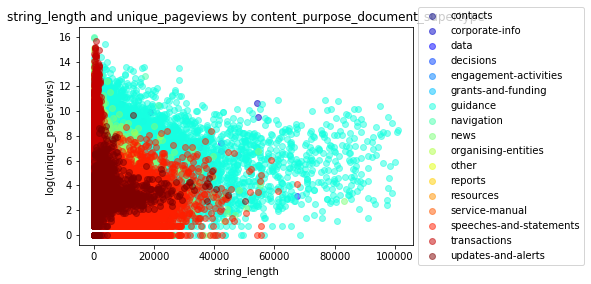

In [101]:
scatter_byvar(df=content_performance, x='string_length', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


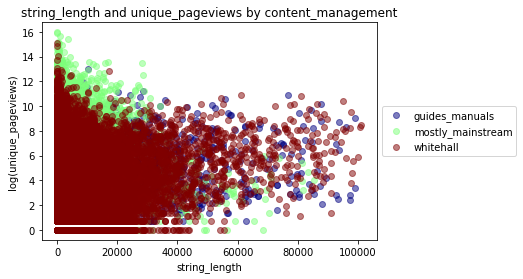

In [151]:
scatter_byvar(df=content_performance, x='string_length', y='unique_pageviews', byvar='content_management', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


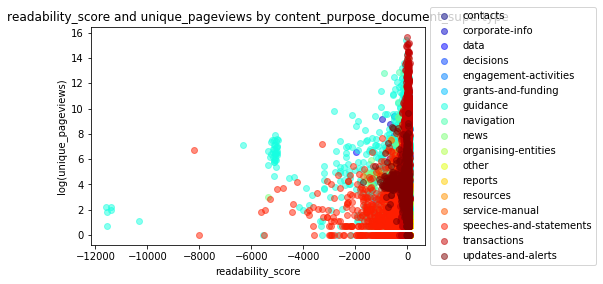

In [155]:
scatter_byvar(df=content_performance, x='readability_score', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


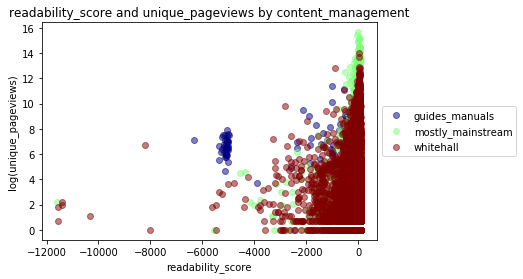

In [156]:
scatter_byvar(df=content_performance, x='readability_score', y='unique_pageviews', byvar='content_management', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


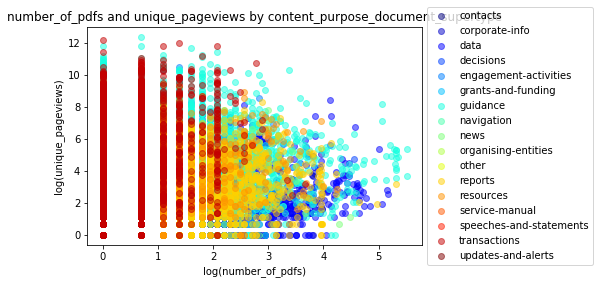

In [158]:
scatter_byvar(df=content_performance, x='number_of_pdfs', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=True)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


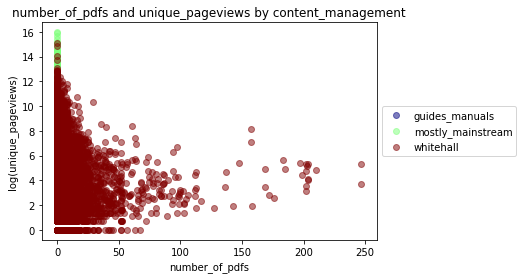

In [160]:
scatter_byvar(df=content_performance, x='number_of_pdfs', y='unique_pageviews', byvar='content_management', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


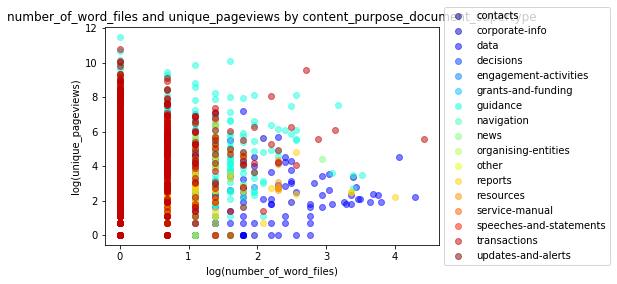

In [104]:
scatter_byvar(df=content_performance, x='number_of_word_files', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=True)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


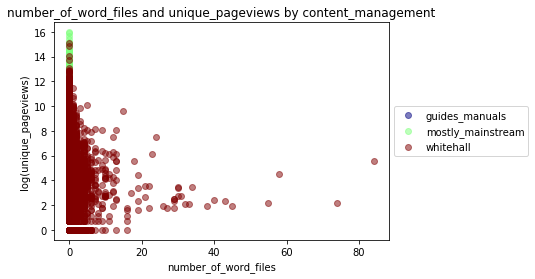

In [161]:
scatter_byvar(df=content_performance, x='number_of_word_files', y='unique_pageviews', byvar='content_management', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


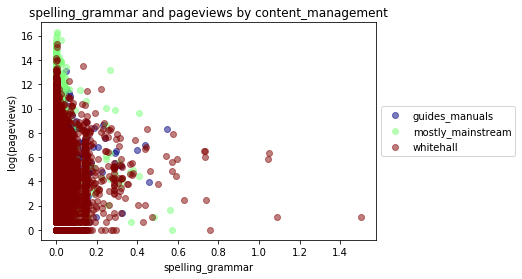

In [182]:
scatter_byvar(df=content_performance, x='spelling_grammar', y='pageviews', byvar='content_management', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6]),
 <a list of 10 Text xticklabel objects>)

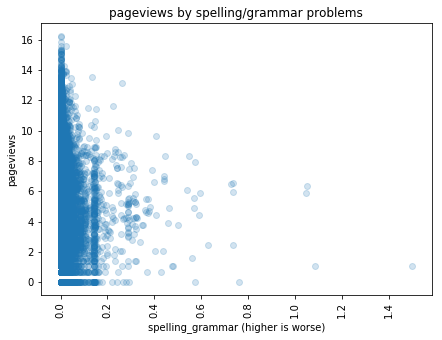

In [185]:
# content_performance.plot(x='spelling_grammar', y='pageviews', color='DarkBlue', style=".", figsize=(12, 10))

# normal values
plt.figure(figsize=(7, 5))

plt.xlabel('spelling_grammar (higher is worse)')
plt.ylabel('pageviews')
plt.scatter(content_performance.spelling_grammar,  
            np.log(content_performance.pageviews), 
            alpha=0.2) 
plt.title("pageviews by spelling/grammar problems")

plt.xticks(rotation=90)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


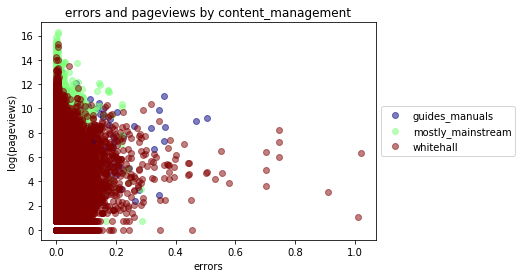

In [183]:
scatter_byvar(df=content_performance, x='errors', y='pageviews', byvar='content_management', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


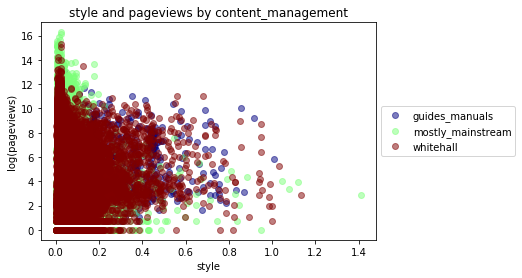

In [184]:
scatter_byvar(df=content_performance, x='style', y='pageviews', byvar='content_management', ylog=True, xlog=False)

#### retractions
Check apostrophe use in contractions. 
This should feed into a general ‘spelling/grammar errors’ metric.

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


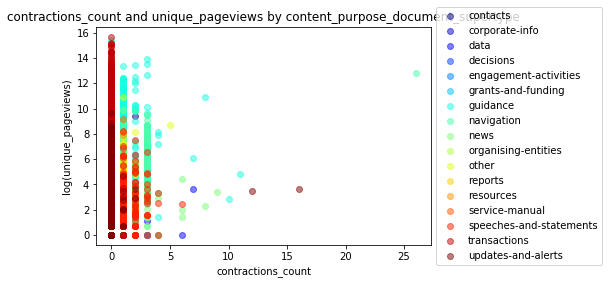

In [105]:
scatter_byvar(df=content_performance, x='contractions_count', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=False)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


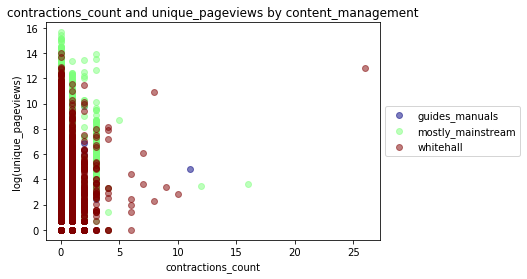

In [162]:
scatter_byvar(df=content_performance, x='contractions_count', y='unique_pageviews', byvar='content_management', ylog=True, xlog=False)

#### retext-equality 
- Warn about possible insensitive, inconsiderate language. This has some interesting changes (‘commit suicide’ to ‘die by suicide’, for example). Not sure how publishers would respond to this if they had lots of changes, but inclusive language should be important for us.

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


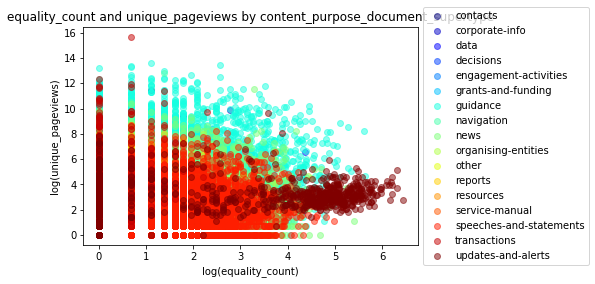

In [107]:
scatter_byvar(df=content_performance, x='equality_count', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=True)

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


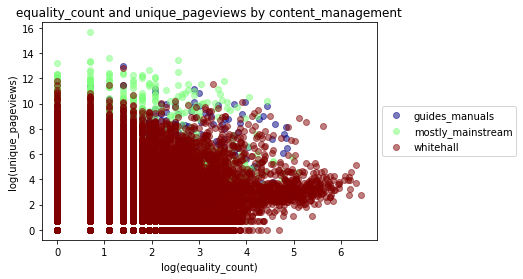

In [163]:
scatter_byvar(df=content_performance, x='equality_count', y='unique_pageviews', byvar='content_management', ylog=True, xlog=True)

#### retext-indefinite-article
Check if indefinite articles (a, an) are used correctly. This should feed into a general ‘spelling/grammar errors’ metric.


/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


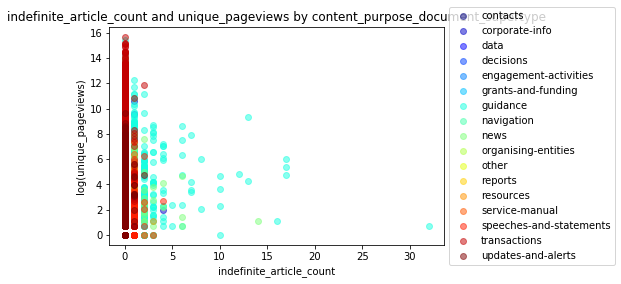

In [108]:
scatter_byvar(df=content_performance, x='indefinite_article_count', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=False)

In [22]:
#scatter_byvar(df=content_performance, x='readability_score', y='unique_pageviews', byvar='document_type')

/Users/ellieking/Documents/give-depts-data/give_data/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


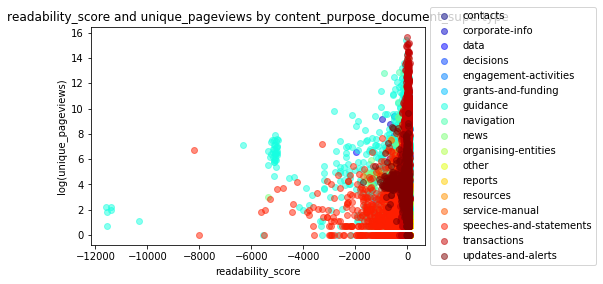

In [109]:
scatter_byvar(df=content_performance, x='readability_score', y='unique_pageviews', byvar='content_purpose_document_supertype', ylog=True, xlog=False)

### pageviews by readability score

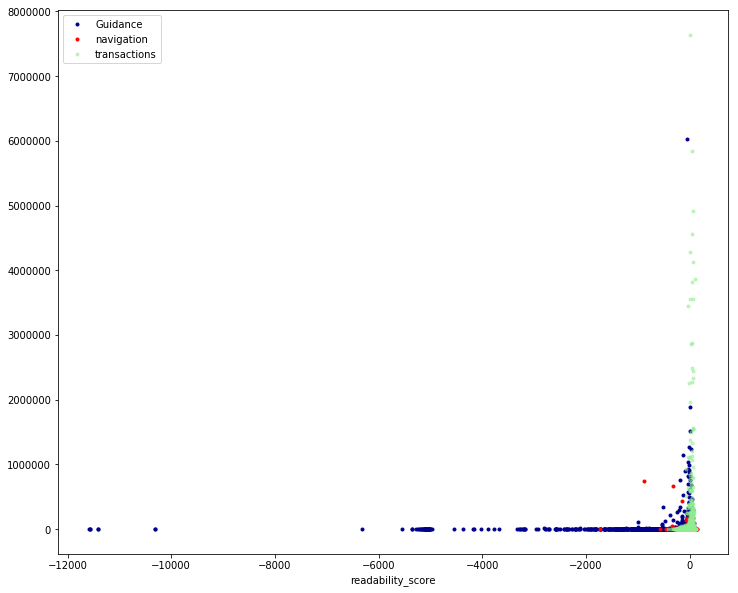

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))

scatter1 = content_performance[content_performance['content_purpose_document_supertype']=='guidance'].plot(x='readability_score', y='pageviews', color='DarkBlue', label='Guidance', style=".", ax=ax)
scatter2 = content_performance[content_performance['content_purpose_document_supertype']=='navigation'].plot(x='readability_score', y='pageviews', color='Red', label='navigation', style=".", ax=ax)
scatter3 = content_performance[content_performance['content_purpose_document_supertype']=='transactions'].plot(x='readability_score', y='pageviews', color='LightGreen', label='transactions', style=".", alpha=0.5, ax=ax)

plt.legend()

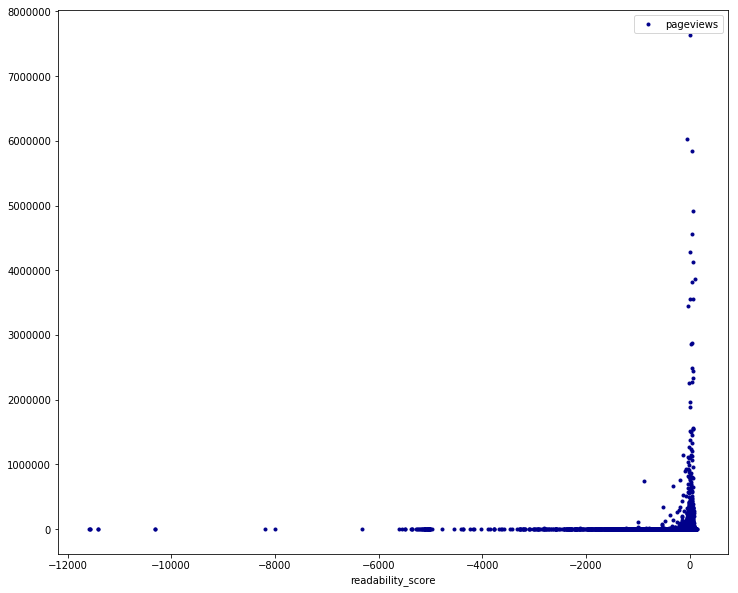

In [25]:
content_performance.plot(x='readability_score', y='pageviews', color='DarkBlue', style=".", figsize=(12, 10))



In [26]:
content_performance.readability_score.describe()

count    366564.000000
mean         14.481152
std         119.518684
min      -11595.000000
25%           7.000000
50%          26.000000
75%          43.000000
max         147.000000
Name: readability_score, dtype: float64

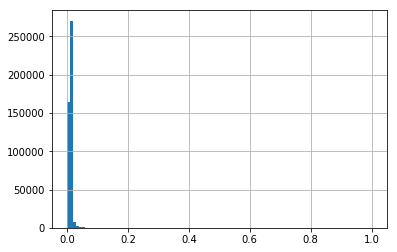

In [27]:
content_performance.readability_score_scaled.hist(bins=100)

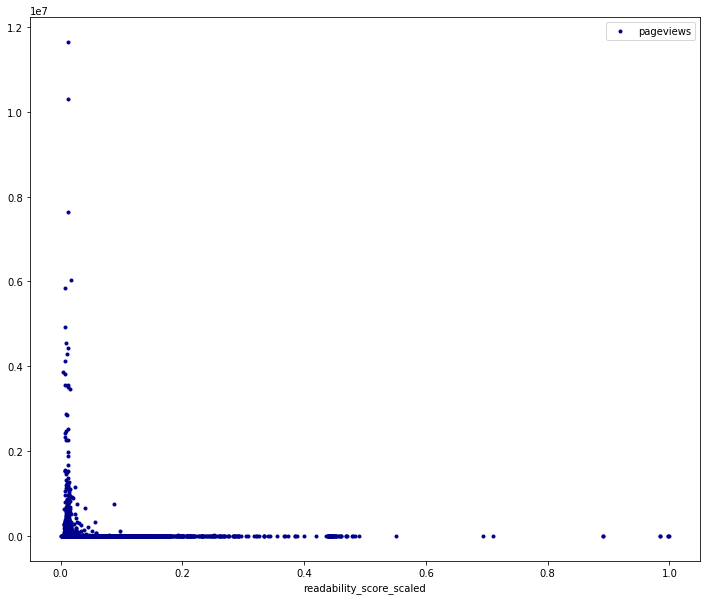

In [28]:
content_performance.plot(x='readability_score_scaled', y='pageviews', color='DarkBlue', style=".", figsize=(12, 10))



### pageviews by spelling/grammar

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text xticklabel objects>)

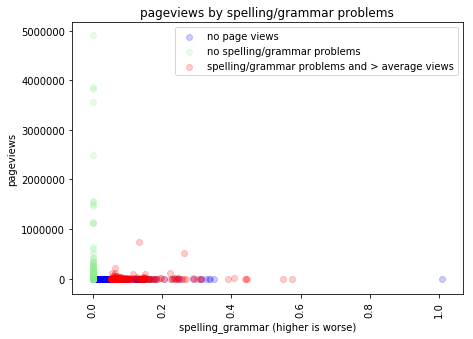

In [29]:
# content_performance.plot(x='spelling_grammar', y='pageviews', color='DarkBlue', style=".", figsize=(12, 10))

# normal values
plt.figure(figsize=(7, 5))
# plt.text(0, 0, "taxons with no content in dev set", color='red', horizontalalignment='center', 
#          verticalalignment='bottom')
plt.xlabel('spelling_grammar (higher is worse)')
plt.ylabel('pageviews')
plt.scatter(content_performance.spelling_grammar[content_performance['pageviews']==0],  
            content_performance.pageviews[content_performance['pageviews']==0], 
            c = 'b',
            alpha=0.2, 
            label='no page views'
            )
plt.scatter(content_performance.spelling_grammar[(content_performance['spelling_grammar']==0) ],  
            content_performance.pageviews[(content_performance['spelling_grammar']==0)], 
            c = 'LightGreen',
            alpha=0.2, 
            label='no spelling/grammar problems'
            )
plt.scatter(content_performance.spelling_grammar[(content_performance['spelling_grammar']>0.05) & (content_performance['pageviews']>content_performance['pageviews'].mean())],  
            content_performance.pageviews[(content_performance['spelling_grammar']>0.05)  & (content_performance['pageviews']>content_performance['pageviews'].mean())], 
            c = 'red',
            alpha=0.2, 
            label='spelling/grammar problems and > average views'
            )

plt.legend()

plt.title("pageviews by spelling/grammar problems")

plt.xticks(rotation=90)

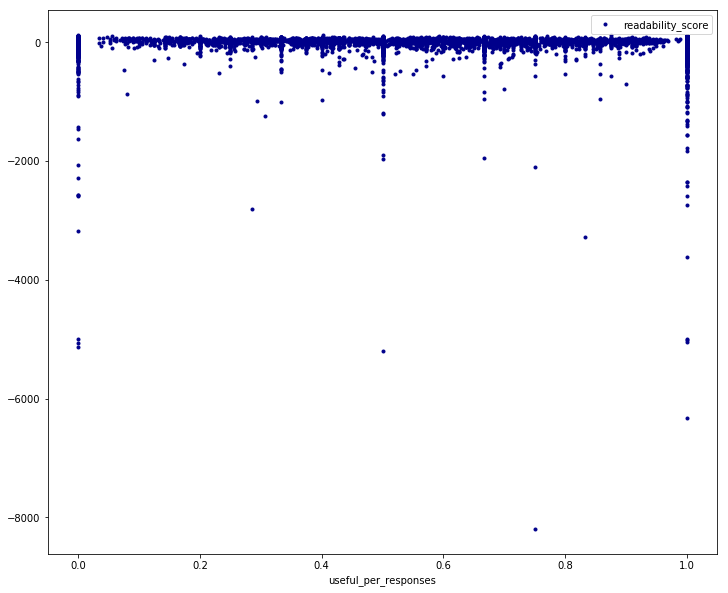

In [30]:
content_performance.plot(x='useful_per_responses', y='readability_score', color='DarkBlue', style=".", figsize=(12, 10))



## metric by content age

In [31]:
first_published = content_performance[['first_published_at', 'pageviews', 'unique_pageviews', 'document_type', 'content_purpose_document_supertype']].copy()

In [32]:
first_published['first_published_at'] = pd.to_datetime(first_published['first_published_at']).copy()
first_published.index = first_published['first_published_at']

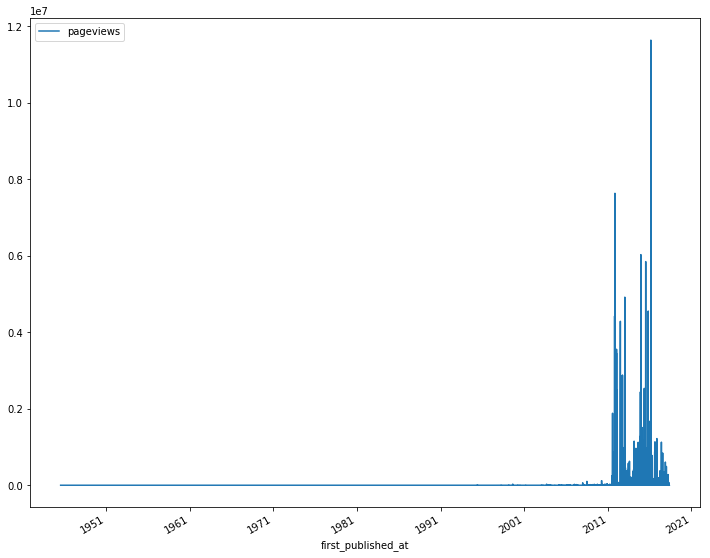

In [33]:
first_published.plot(x='first_published_at', y='pageviews', figsize=(12, 10))

Old items are generally not being viewed

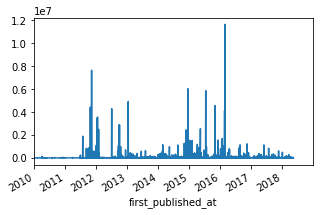

In [34]:
ax = first_published.plot(x='first_published_at', y='pageviews', figsize=(5, 3))
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2018-12-31'))
ax.legend_.remove()

(0, 1000)

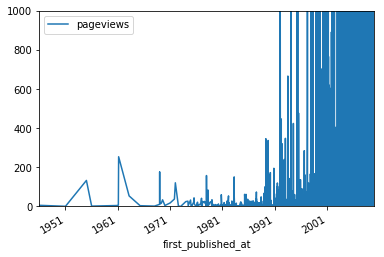

In [35]:
ay = first_published.plot(x='first_published_at', y='pageviews')
ay.set_xlim(pd.Timestamp('1945-12-31'), pd.Timestamp('2009-12-31'))
ay.set_ylim(0, 1000)

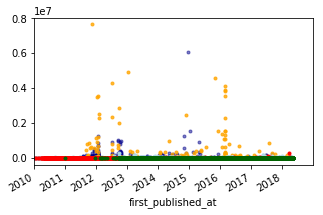

In [36]:
fig, ax = plt.subplots(figsize=(5, 3))

first_published[first_published['document_type']=='guide'].plot(x='first_published_at', y='pageviews', color='DarkBlue', label='guide', style=".", ax=ax, alpha=0.5)
first_published[first_published['document_type']=='transaction'].plot(x='first_published_at', y='pageviews', color='Orange', label='transaction', style=".", ax=ax, alpha=0.8)

first_published[first_published['document_type']=='guidance'].plot(x='first_published_at', y='pageviews', color='LightBlue', label='guidance', style=".", ax=ax)
first_published[first_published['document_type']=='news_story'].plot(x='first_published_at', y='pageviews', color='Red', label='news_story', style=".", ax=ax)
first_published[first_published['document_type']=='world_news_story'].plot(x='first_published_at', y='pageviews', color='DarkGreen', label='world_news_story', style=".", ax=ax)
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2018-12-31'))
ax.legend_.remove()

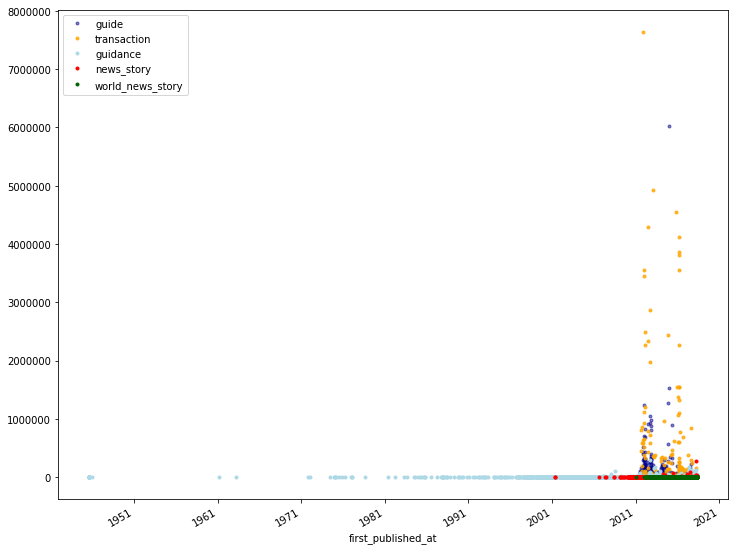

In [37]:
fig, ax = plt.subplots(figsize=(12, 10))

first_published[first_published['document_type']=='guide'].plot(x='first_published_at', y='pageviews', color='DarkBlue', label='guide', style=".", ax=ax, alpha=0.5)
first_published[first_published['document_type']=='transaction'].plot(x='first_published_at', y='pageviews', color='Orange', label='transaction', style=".", ax=ax, alpha=0.8)

first_published[first_published['document_type']=='guidance'].plot(x='first_published_at', y='pageviews', color='LightBlue', label='guidance', style=".", ax=ax)
first_published[first_published['document_type']=='news_story'].plot(x='first_published_at', y='pageviews', color='Red', label='news_story', style=".", ax=ax)
first_published[first_published['document_type']=='world_news_story'].plot(x='first_published_at', y='pageviews', color='DarkGreen', label='world_news_story', style=".", ax=ax)

plt.legend()

#### Trying to figure out where the anomalous early date comes from

In [110]:
groups = first_published.groupby('content_purpose_document_supertype')

In [111]:
first_published.groupby('content_purpose_document_supertype').describe()

pageviews                               \
                                       count          mean            std   
content_purpose_document_supertype                                          
contacts                               148.0  27123.932432   74820.994849   
corporate-info                       12715.0    170.195517    1926.900776   
data                                 35687.0     54.066159     474.833843   
decisions                            53407.0     10.808808     121.567634   
engagement-activities                 6832.0    131.348946    1025.424144   
grants-and-funding                    1416.0    102.965395     314.598650   
guidance                            128518.0    965.395657   23427.394639   
navigation                            9561.0   6049.315867  163373.631019   
news                                 85388.0     58.591371    1278.707242   
organising-entities                   9320.0   2135.770064   62879.813196   
other                                32309.0     74.753753    7096.711438   
reports                              28990.0     50.056813     303.097595   
resources                             1825.0    254.787945    1597.433414   
service-manual                         195.0    904.507692    1900.189875   
speeches-and-statements               9698.0     35.663951     264.772589   
transactions                          6904.0  19620.738992  218138.362202   
updates-and-alerts                    5397.0     46.904391     383.376892   

                                                                    \
                                     min     25%     50%       75%   
content_purpose_document_supertype                                   
contacts                             0.0  608.25  2394.5  11413.75   
corporate-info                       0.0    0.00     3.0     18.00   
data                                 0.0    0.00     2.0     10.00   
decisions                            0.0    0.00     1.0      5.00   
engagement-activities                0.0    2.00     7.0     21.00   
grants-and-funding                   0.0    0.00     5.0     79.25   
guidance                             0.0    3.00    16.0     77.00   
navigation                           0.0    0.00    24.0    391.00   
news                                 0.0    0.00     1.0      8.00   
organising-entities                  0.0    6.00    26.0    105.00   
other                                0.0    0.00     0.0      0.00   
reports                              0.0    1.00     5.0     20.00   
resources                            0.0    7.00    20.0     86.00   
service-manual                      10.0  186.00   394.0    748.00   
speeches-and-statements              0.0    0.25     3.0     12.00   
transactions                         0.0   12.00    78.0    569.50   
updates-and-alerts                   0.0    0.00     2.0     17.00   

                                               unique_pageviews                \
                                           max            count          mean   
content_purpose_document_supertype                                              
contacts                              571622.0            148.0  19016.371622   
corporate-info                        151282.0          12715.0    136.765710   
data                                   31532.0          35687.0     40.871606   
decisions                              19324.0          53407.0      8.271331   
engagement-activities                  55069.0           6832.0    100.216774   
grants-and-funding                      6209.0           1416.0     85.916667   
guidance                             6031401.0         128518.0    751.529615   
navigation                          11641985.0           9561.0   4471.496810   
news                                  279073.0          85388.0     51.737504   
organising-entities                  4423082.0           9320.0   1684.113948   
other                                113

In [112]:
first_published.groupby('content_purpose_document_supertype').groups['other'].min()

Timestamp('2002-02-08 00:00:00')

In [113]:
for group in groups:
    print(min(group[1].first_published_at))

2014-12-04 09:38:33
1951-01-01 00:00:00
1981-07-31 23:00:00
1955-01-01 00:00:00
1994-03-31 23:01:00
2014-08-26 13:47:51
1945-07-18 10:11:00
1992-01-01 00:00:00
1995-07-20 00:00:00
2011-10-11 16:11:43
2002-02-08 00:00:00
1969-01-01 00:00:00
2005-05-31 23:00:00
2016-02-16 17:25:28
2008-06-24 00:00:00
1991-07-04 11:00:00
2002-04-09 01:00:00


In [114]:
first_published.index.min()

Timestamp('1945-07-18 10:11:00')

In [115]:
first_published.loc[first_published.index.min()]

first_published_at                    1945-07-18 10:11:00
pageviews                                              33
unique_pageviews                                       22
document_type                                    guidance
content_purpose_document_supertype               guidance
Name: 1945-07-18 10:11:00, dtype: object

In [116]:
content_performance.columns

Index(['Unnamed: 0', 'pageviews', 'unique_pageviews', 'feedex_comments',
       'is_this_useful_yes', 'is_this_useful_no',
       'number_of_internal_searches', 'exits', 'entrances', 'bounce_rate',
       'avg_time_on_page', 'id', 'content_id', 'title', 'base_path',
       'description', 'number_of_pdfs', 'document_type',
       'content_purpose_document_supertype', 'first_published_at',
       'public_updated_at', 'number_of_word_files', 'status',
       'readability_score', 'contractions_count', 'equality_count',
       'indefinite_article_count', 'passive_count', 'profanities_count',
       'redundant_acronyms_count', 'repeated_words_count', 'simplify_count',
       'spell_count', 'string_length', 'sentence_count', 'word_count',
       'primary_organisation_title', 'primary_organisation_content_id',
       'primary_organisation_withdrawn', 'content_hash', 'locale',
       'publishing_api_payload_version', '_merge', 'count_survey_responses',
       'response_per_pageview', 'response_

In [117]:
content_performance.sort_values('first_published_at')['base_path'].iloc[0]
# d1[~d1.timestamp.dt.date.duplicated()]

# content_performance.loc[content_performance['first_published_at'].idxmin()]

'/government/publications/ukho-1825-archives-catalogue'

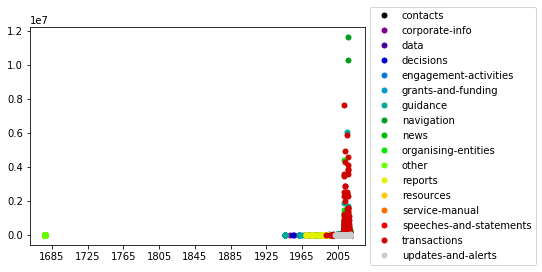

In [118]:
# Plot
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1.0, len(groups)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', colors))

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    ax.plot(group['first_published_at'], group['pageviews'], marker='o', linestyle='', ms=5, label=name)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.show()

ALERT! Cannot understand why this 1686 data is coming from. It is not showing up when I print the timestamps. how is it getting into plot ?



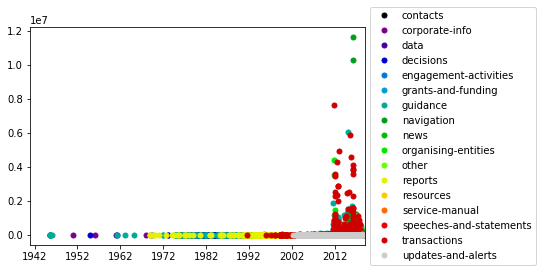

In [119]:
# Plot
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1.0, len(groups)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', colors))

ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    ax.plot(group['first_published_at'], group['pageviews'], marker='o', linestyle='', ms=5, label=name)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(pd.Timestamp('1940-12-31'), pd.Timestamp('2018-12-31'))

plt.show()

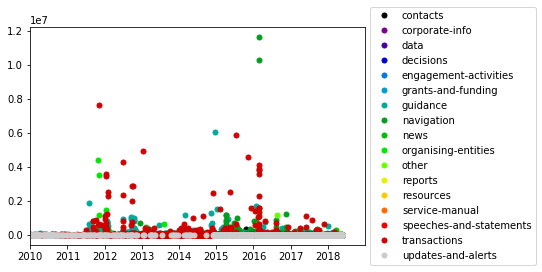

In [120]:
# Plot
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1.0, len(groups)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', colors))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    ax.plot(group['first_published_at'], group['pageviews'], marker='o', linestyle='', ms=5, label=name)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(pd.Timestamp('2009-12-31'), pd.Timestamp('2018-12-31'))

plt.show()

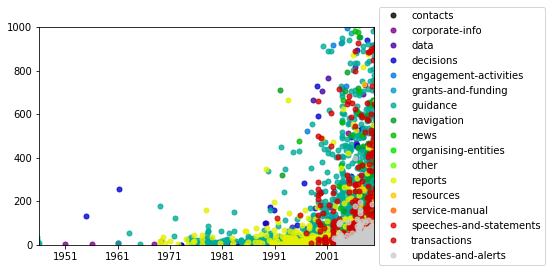

In [121]:
# Plot
cmap = plt.get_cmap('nipy_spectral')
colors = cmap(np.linspace(0, 1.0, len(groups)))

fig, ax = plt.subplots()
ax.set_prop_cycle(cycler('color', colors))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    ax.plot(group['first_published_at'], group['pageviews'], marker='o', linestyle='', ms=5, label=name, alpha=0.8)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlim(pd.Timestamp('1945-12-31'), pd.Timestamp('2009-12-31'))
ax.set_ylim(0, 1000)
plt.show()

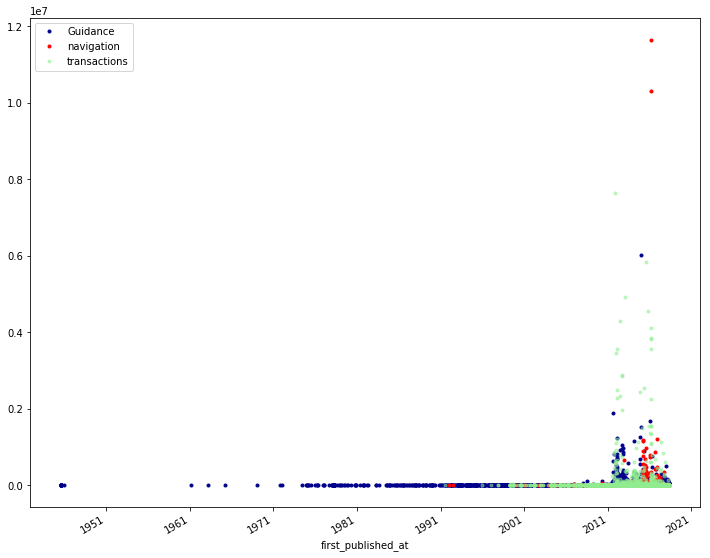

In [122]:
fig, ax = plt.subplots(figsize=(12, 10))

first_published[first_published['content_purpose_document_supertype']=='guidance'].plot(x='first_published_at', y='pageviews', color='DarkBlue', label='Guidance', style=".", ax=ax)
first_published[first_published['content_purpose_document_supertype']=='navigation'].plot(x='first_published_at', y='pageviews', color='Red', label='navigation', style=".", ax=ax)
first_published[first_published['content_purpose_document_supertype']=='transactions'].plot(x='first_published_at', y='pageviews', color='LightGreen', label='transactions', style=".", alpha=0.5, ax=ax)

plt.legend()